# Ejercicio 1

In [1]:
import numpy as np
import scipy.io as scio
import scipy.signal as scs
import matplotlib.pyplot as plt
from IPython.display import Audio


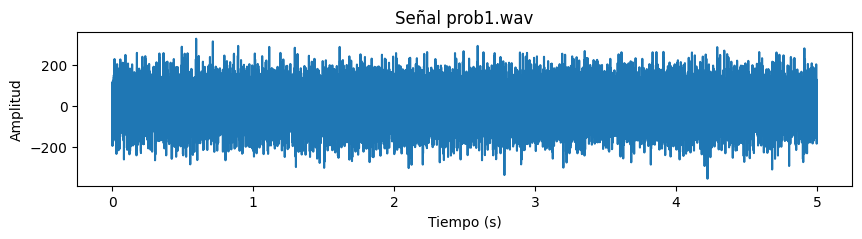

In [2]:
fs, x = scio.wavfile.read('prob1.wav')
t = (1/fs)*np.arange(x.size)
plt.figure(figsize=(10,2))
plt.plot(t, x)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal prob1.wav')
plt.show()
Audio(x, rate=fs)

## a) Periodograma

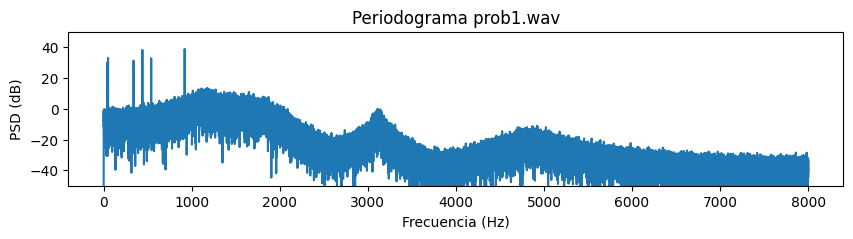

[ 40.  50. 340. 440. 540. 920.]


In [32]:
f, Pp = scs.periodogram(x, fs=fs, window='boxcar')
umbral = 50
ticks = f[Pp > umbral]
plt.figure(figsize=(10,2))
plt.plot(f, 10*np.log10(Pp))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.ylim((-50,50))
plt.title('Periodograma prob1.wav')
plt.show()
print(ticks)

## b) Método de Bartlett

In [4]:
def bartlett(x, k, fs=1, window='boxcar'):
    M = x.size // k
    return scs.welch(x, fs=fs, nperseg=M, noverlap=0, window=window, detrend=None)

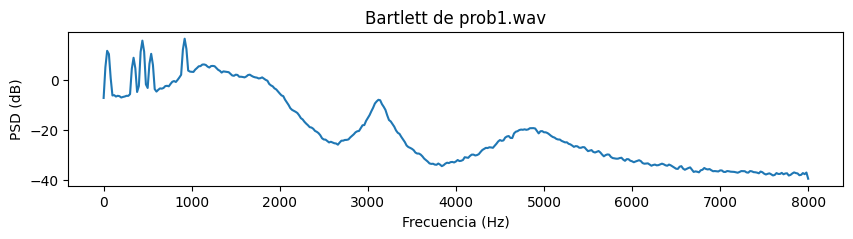

[  20.   40.   60.  340.  420.  440.  460.  520.  540.  560.  900.  920.
  940. 1060. 1080. 1100. 1120. 1140. 1160. 1180. 1200. 1220. 1240. 1260.
 1280.]


In [30]:
f, Pb = bartlett(x, 100, fs=fs, window='blackman')
umbral = 3
peaks = f[Pb > umbral]
plt.figure(figsize=(10,2))
plt.plot(f, 10*np.log10(Pb))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Bartlett de prob1.wav')
plt.show()
print(peaks)

## Método de Welch

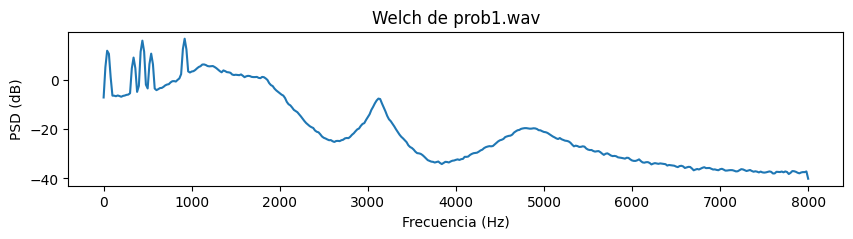

[  20.   40.   60.  340.  420.  440.  460.  520.  540.  560.  900.  920.
  940. 1080. 1100. 1120. 1140. 1160. 1180. 1200. 1220. 1240. 1260.]


In [28]:
k = 100
L = x.size//k
D = L//2
window = 'blackman'
f, Pw = scs.welch(x, fs=fs, window=window, nperseg=L, noverlap=D, detrend=None)
umbral = 3
peaks = f[Pw > umbral]

plt.figure(figsize=(10,2))
plt.plot(f, 10*np.log10(Pw))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD (dB)')
plt.title('Welch de prob1.wav')
plt.show()
print(peaks)